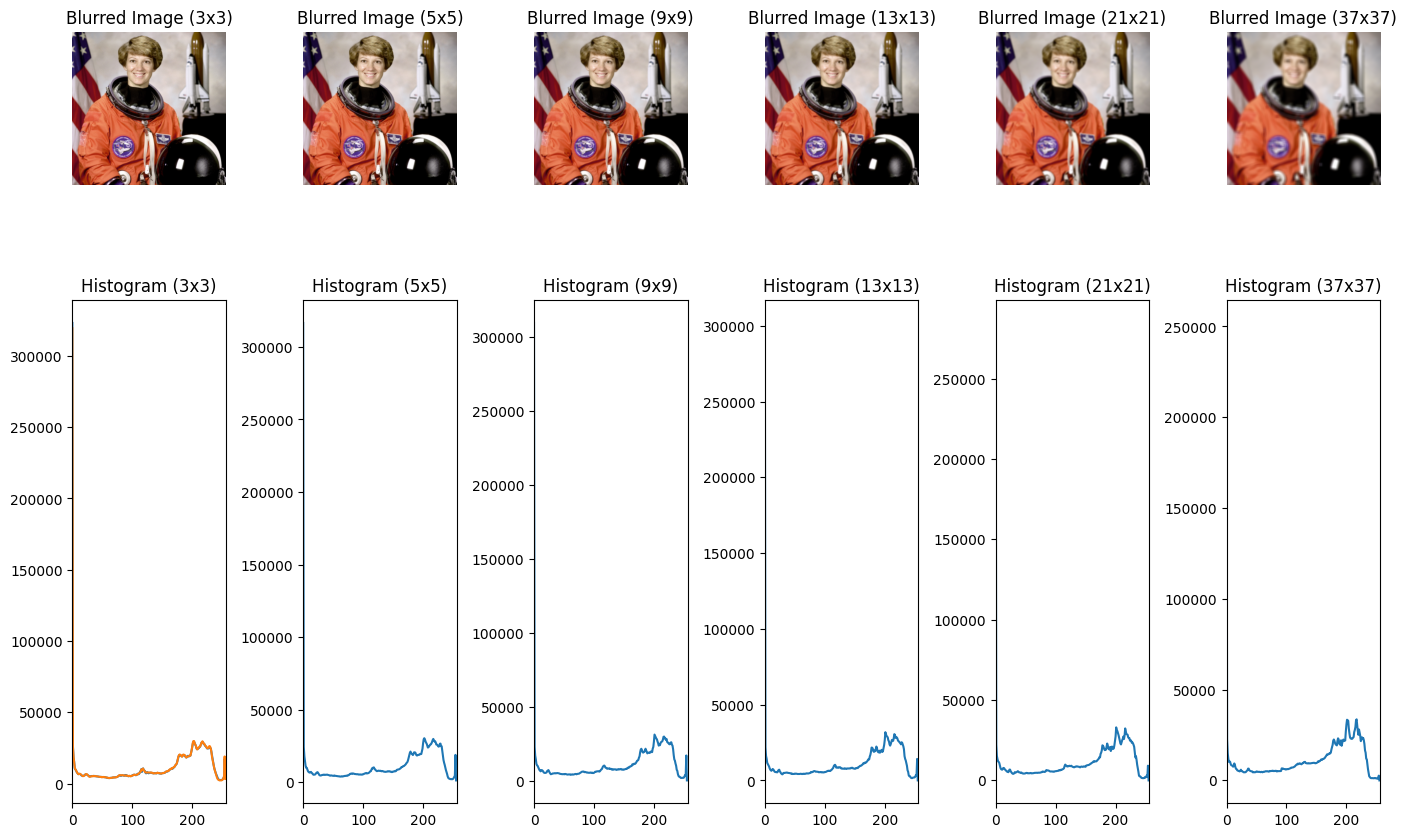

In [30]:
import cv2, numpy as np, matplotlib.pyplot as plt

# 이미지 불러오기
image = cv2.imread('example.jpg')

# OpenCV는 BGR 형식으로 이미지를 읽으므로, RGB로 변환
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 다양한 커널 사이즈 설정
kernel_sizes = [3, 5, 9, 13, 21, 37]

# 원본 이미지 히스토그램 계산
original_hist = cv2.calcHist([image_rgb], [0], None, [256], [0, 256])

# 서브플롯 크기 설정
cols = len(kernel_sizes)
rows = 2

# 3x4 형태로 서브플롯 크기 설정
plt.figure(figsize=(14, 10))

# 원본 이미지 및 히스토그램 출력 (첫 번째 줄)
plt.subplot(rows, cols, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(rows, cols, cols + 1)
plt.plot(original_hist)
plt.title("Histogram of Original Image")
plt.xlim([0, 256])

# 각 커널 사이즈에 대해 블러링된 이미지와 히스토그램 출력
for i, ks in enumerate(kernel_sizes):
    kernel = np.ones((ks, ks), np.float32) / ks**2  # 평균 커널 생성
    blurred_image = cv2.filter2D(image_rgb, -1, kernel)  # 평균 블러링 적용
    
    # 블러링된 이미지 출력 (첫 번째 줄)
    plt.subplot(rows, cols, 1 + i)
    plt.imshow(blurred_image)
    plt.title(f'Blurred Image ({ks}x{ks})')
    plt.axis('off')

    # 블러링된 이미지 히스토그램 출력 (두 번째 줄)
    blurred_hist = cv2.calcHist([blurred_image], [0], None, [256], [0, 256])
    plt.subplot(rows, cols, cols + i + 1)
    plt.plot(blurred_hist)
    plt.title(f'Histogram ({ks}x{ks})')
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()
